# Morti Durante la tragedia del Titanic

### Importiamo le librerie

In [35]:
import kaggle
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

### Lettura dataset 


In [5]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Rimozione NaN

In [26]:
# Conta il numero di righe con NaN prima della rimozione
rows_with_nan_before = df.isna().any(axis=1).sum()

# Rimuovi i valori NaN
df.dropna(inplace=True)

# Calcola il numero di righe rimosse
rows_removed = rows_with_nan_before - df.shape[0]

# Stampa il numero di righe rimosse
print("Numero di righe rimosse:", rows_removed)


Numero di righe rimosse: 380


## Grafici 

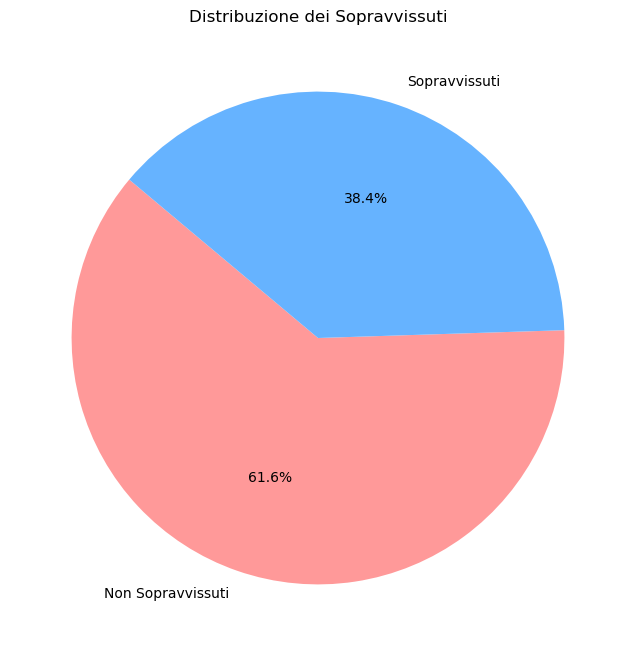

In [6]:
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Non Sopravvissuti', 'Sopravvissuti'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribuzione dei Sopravvissuti')
plt.show()

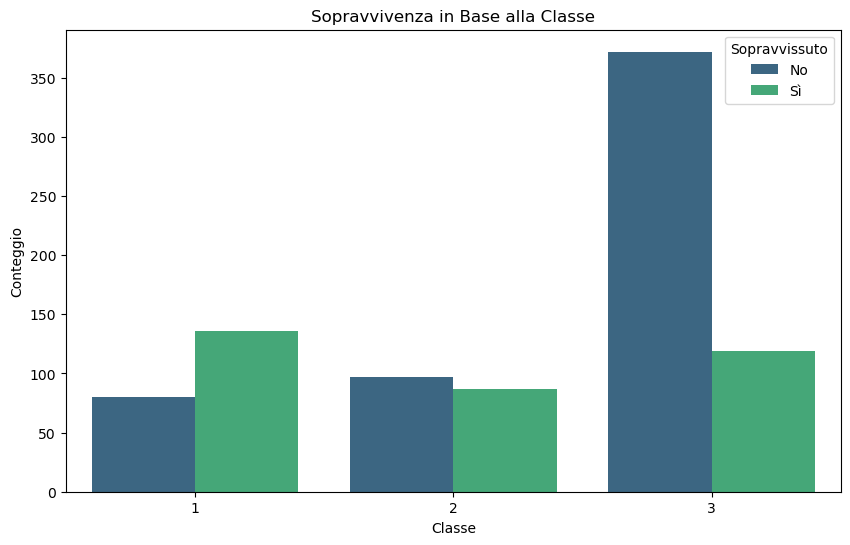

In [8]:
# Grafico a barre per la sopravvivenza in base alla classe
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue=df['Survived'].astype(str), palette='viridis')
plt.title('Sopravvivenza in Base alla Classe')
plt.xlabel('Classe')
plt.ylabel('Conteggio')
plt.legend(title='Sopravvissuto', loc='upper right', labels=['No', 'Sì'])
plt.show()


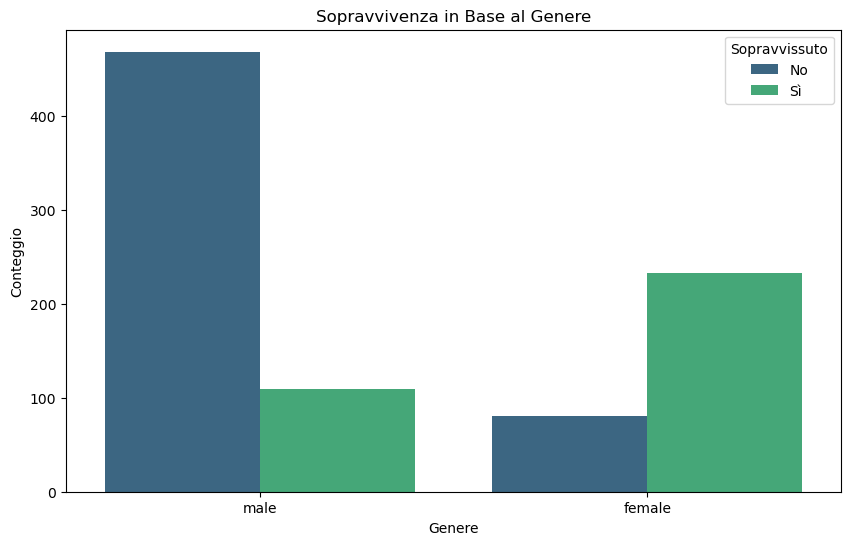

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue=df['Survived'].astype(str), palette='viridis')
plt.title('Sopravvivenza in Base al Genere')
plt.xlabel('Genere')
plt.ylabel('Conteggio')
plt.legend(title='Sopravvissuto', loc='upper right', labels=['No', 'Sì'])
plt.show()

# Machine Learning RandomForest

In [9]:
# Carica il dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Esplora il dataset
print(df.head())

# Preprocessing
# Rimuovi le colonne non rilevanti o con valori nulli
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = df.dropna()

# Codifica le variabili categoriche
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Dividi il dataset in features e target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividi il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra il modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Valuta il modello
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Altre metriche di valutazione
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

In [36]:
# Creazione di un modello di classificazione SVM
svm_model = SVC(kernel='linear', random_state=42)

# Addestramento del modello SVM
svm_model.fit(X_train, y_train)

# Predizione sul set di test utilizzando il modello SVM
y_pred_svm = svm_model.predict(X_test)

# Valutazione delle prestazioni del modello SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8048780487804879
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205

